**In this experiment, we have used a different methode of generating privet center**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import balanced_accuracy_score
import numpy as np
np.random.seed(42)
from collections import Counter
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

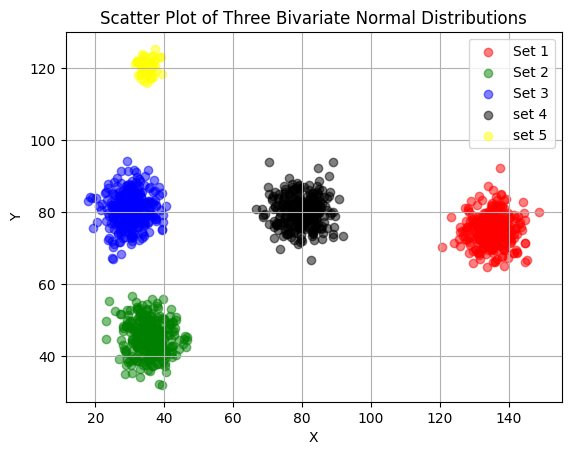

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the three bivariate normal distributions
means = [[135, 75], [35, 45], [30, 80],[80,80],[35,120]]
covariances = [[[20, 0], [0, 20]], [[20, 0], [0, 20]],[[20, 0], [0, 20]],[[20, 0], [0, 20]], [[5, 0], [0, 5]]]
sizes = [300, 300,300,300, 50]

# Generate 2D data from the three bivariate normal distributions
data_sets = [np.random.multivariate_normal(means[i], covariances[i], sizes[i]) for i in range(5)]
# print(data_sets)
# Plot the scatter plot for each data set
colors = ['red', 'green', 'blue','black','yellow']
labels = ['Set 1', 'Set 2', 'Set 3','set 4','set 5']

for i in range(5):
    plt.scatter(data_sets[i][:, 0], data_sets[i][:, 1], alpha=0.5, color=colors[i], label=labels[i])

# Add labels and legend
plt.title('Scatter Plot of Three Bivariate Normal Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X=np.concatenate(data_sets)
X

array([[137.22137322,  74.38166325],
       [137.8965512 ,  81.81119658],
       [133.95283427,  73.9529077 ],
       ...,
       [ 32.19036517, 121.81838208],
       [ 34.37621992, 119.37443725],
       [ 36.76732529, 120.76037781]])

In [ ]:
km1 =KMeans(n_clusters=5, max_iter=5)
y_predicted = km1.fit_predict(X)
B=np.array(km1.cluster_centers_)

print("Roughly kmean center :", B)

Roughly kmean center : [[ 30.1133969   80.48829282]
 [ 79.64091736  80.19837479]
 [134.95177112  74.92730885]
 [ 35.48065773  45.32686425]
 [ 35.06392598 120.32825757]]


In [ ]:
import numpy as np
import pandas as pd

def aglo2(X, B, k,t):
    a = 16 * (np.log(k) + 2)
    Bi = [[] for _ in range(len(B))] # list of ponts in each cluster
    X_dist = []
    X_min_bindx = [] # it will stor index of closet center in B(rought Kmean centers)

    for i in range(len(X)):
        min_dist = 10000000000
        min_index = -1 # index of nearest center
        Xi = X[i]

        for j in range(len(B)): # calculeting distence with each centert in B
            bj =B[j]
            dist = np.sum((Xi - bj) ** 2)

            if dist < min_dist: #finding nearest center
                min_dist = dist
                min_index = j  #  updating index of nearest center

        Bi[min_index].append(X[i]) # append in nearest cluster
        X_dist.append(min_dist) # distence from nearest clustre center in B
        X_min_bindx.append(min_index)

    c_phi = 0 # sum of all distence of all point with neares centre in B
    for i in range(len(X)):
        c_phi += X_dist[i]

    S_x = []
    sigma_s = 0

    for i in range(len(X)):
        b_index = X_min_bindx[i]
        if len(Bi[b_index])<t: # if cluster size is less then corset size, ignore that cluster
          continue
        bi = B [b_index]
        si = 0
        si += (a * X_dist[i]) / (c_phi)

        temp_sum = 0

        for j in range(len(Bi[b_index])):
            temp_sum += np.sum((bi - Bi[b_index][j]) ** 2)

        si += (2 * a * temp_sum) / (len(Bi[b_index]) * c_phi)
        si += 4 * len(X) / len(Bi[b_index])
        S_x.append(si)
        sigma_s += si
    if len(S_x)==0:
      return -1;
    p_x = []
    for i in range(len(S_x)):
        p_x.append(S_x[i] / sigma_s)
    np.random.shuffle(p_x)
    return np.argmax(p_x)

**Thise privet center method generets more privacy gaurantee**

In [ ]:
def k_closest_points(points, k, i):
    distances = []
    for point in points:
        distance = np.sqrt(np.sum((point -  points[i])** 2))
        distances.append((distance, point))
    return sorted(range(len(distances)), key=lambda i: distances[i])[:k]

import numpy as np
import random


def privet_center(points, E):
    center = []
    for x in range(points.shape[1]):
        co_ordinates = [i[x] for i in points]
        min_v = min(co_ordinates)
        max_v = max(co_ordinates)
        median=np.median(co_ordinates)
        mean_dif=np.mean([abs(i-median) for i in co_ordinates])
        s = np.sum(co_ordinates) - len(co_ordinates) * (median) + np.random.laplace(scale= mean_dif / E)
        c = len(co_ordinates) + np.random.laplace(scale=2 / E)
        if c <= 1:
            center.append(median)
        else:
            center.append((s / c) + (median))
    return center



In [ ]:
import math
# print(point_got)
def Private_k_Mean(P,k, B, t,E):
  D=[]
  n=len(P)
  while len(P)>t :
    c_index=aglo2(P, B, k,t)
    t_index=k_closest_points(P,t,c_index)
    c=privet_center(P[t_index],E)
    P=np.delete(P,t_index, axis=0)

    D.append(c)

  return np.array(D)



In [ ]:
def cost(X,centers):
  sum=0
  for i in range(len(X)):
    point1=X[i]
    cost_i=100000
    for j in range(len(centers)):
      point2=centers[j]
      if(np.sum((point1 - point2)**2)<cost_i):
        cost_i=np.sum((point1 - point2)**2)
    sum+=cost_i
  return sum

In [ ]:
point_got=Private_k_Mean(X,5, B, 10,0.1)

In [ ]:
point_got

array([[136.34402287,  71.83355794],
       [136.01977225,  67.34245056],
       [ 74.46279069,  81.66286636],
       [ 36.57106929,  53.69159701],
       [132.94384637,  78.67287904],
       [ 31.89538528,  47.24803049],
       [ 79.06507642,  86.57925207],
       [ 86.6932885 ,  76.35558288],
       [ 76.91931475,  81.74574269],
       [ 29.92955119,  48.33803989],
       [142.91316067,  71.70176166],
       [ 31.92089191, 118.8811544 ],
       [ 35.18328953,  79.56194148],
       [ 25.822488  ,  86.41226016],
       [ 35.08001219,  48.03282414],
       [ 37.4661416 ,  77.18466487],
       [138.36002045,  70.62564875],
       [136.11174017,  73.8207966 ],
       [ 80.20642475,  75.94058547],
       [ 37.74401783,  51.71882712],
       [137.33403355,  74.34539008],
       [ 79.27679047,  83.01836167],
       [ 33.91311788,  42.85367832],
       [ 81.19515439,  77.77637365],
       [ 33.25018652,  87.37194333],
       [127.24376986,  72.65990656],
       [ 28.61946662,  75.72807457],
 

In [ ]:
corset_error=[]
random_error=[]
k=5
km_full =KMeans(n_clusters=5)
y_full = km_full.fit_predict(X)
cost_org=km_full.inertia_
for l in  range(15,len(point_got),20):
  km_sub=KMeans(n_clusters=5)
  km_sub.fit_predict(point_got[:l,:])
  sub_center=km_sub.cluster_centers_
  cost_by_sub_center=cost(X,sub_center)
  error=(cost_by_sub_center- cost_org)/cost_org * 100
  corset_error.append(error)
  km_sub=KMeans(n_clusters=5)
  km_sub.fit_predict(X[np.random.choice(len(X), l, replace=False)])
  sub_center=km_sub.cluster_centers_
  cost_by_sub_center=cost(X,sub_center)
  error=(cost_by_sub_center- cost_org)/cost_org * 100
  random_error.append(error)

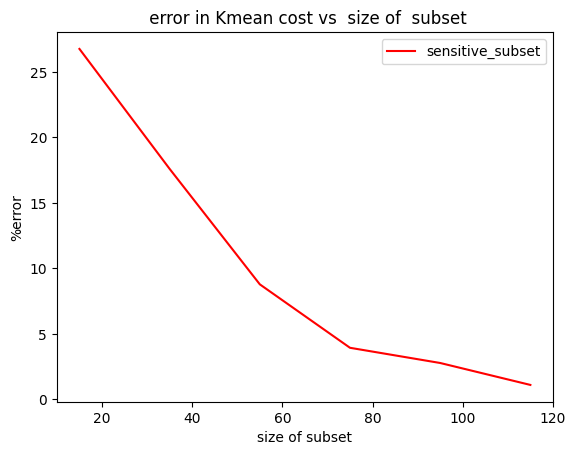

In [ ]:
import matplotlib.pyplot as plt

# Example data
x1 = corset_error

x3 =random_error
y = range(15,len(point_got),20)

# Plot x1 in red
plt.plot(y, x1, color='red', label='sensitive_subset')

# # Plot x2 in green
# plt.plot(y, x2, color='green', label='subset_using_dist')
# Plot x2 in green
# plt.plot(y, x3, color='blue', label='random_subet')

# Customize the plot
plt.xlabel('size of subset')
plt.ylabel('%error')
plt.title(' error in Kmean cost vs  size of  subset')
plt.legend()

# Show the plot
plt.show()